In [79]:
import numpy as np
import quantities as pq
import neo
import elephant
import viziphant
import pickle
np.random.seed(4542)

import matplotlib.pyplot as plt


In [19]:
# time step for simulation: 1ms
dt = 0.001

# number of inputs
m = 20

# number of time points
T = 1.0
n_T = int(T/dt) # 1 seconds

Let's start with synchronized activity with jitter

1000.0


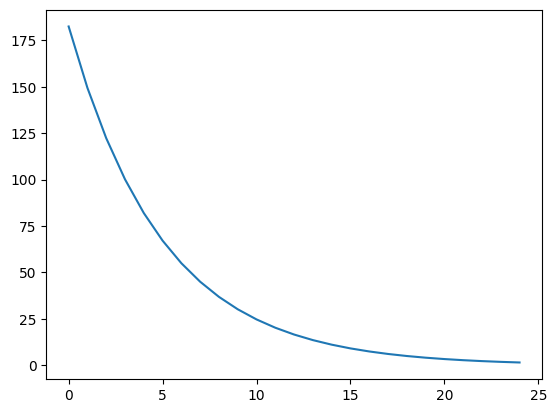

In [59]:
# normalized kernel for modulation of firing rate
tau = 0.005 # time constant
size_kernel = int(tau*5/dt)
kernel = np.exp(-np.arange(size_kernel)*dt/tau)
kernel /= kernel.sum() * dt

print(kernel.sum())

# plot
plt.plot(kernel)

In [60]:
# mean firing rate
mean_rate = 5.0
# correlated event rate
event_rate = 2.0

# instantaneous firing rate of neurons
rho = np.ones([n_T,m]) * mean_rate
# determine events at random times
bool_events = np.random.rand(n_T)<event_rate*dt
ts = np.arange(n_T)[bool_events]

print(ts)


# modulate firing rate for affected neurons (n)
n = 10
nrn_pat = np.arange(n)
# modulate firing rate at event times
for i in nrn_pat:
    # subtract event rate from neurons involved in pattern
    rho[:,i] -= event_rate
    # loop over events
    for t in ts:
        # check the 
        t_end = min(t+size_kernel,n_T) - t
        # add kernel 
        rho[t:t+t_end,i] += kernel[:t_end]
    

[358 387 709]


In [ ]:
# pattern definition
class pattern:
    def __init__(self, n_neuron, neuron_list, latencies):
        self.n_neuron = n_neuron
        self.neuron_list = neuron_list
        latencies = latencies
    


integral of firing rate over time: [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


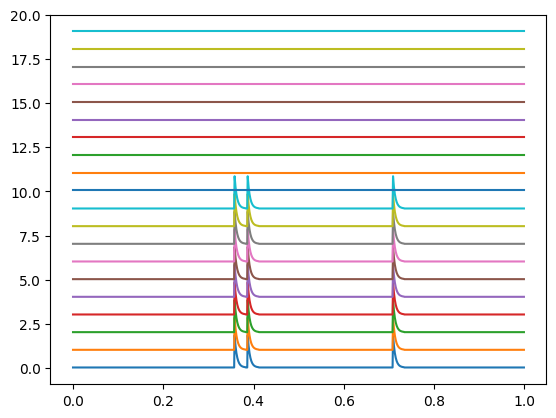

In [65]:
scal_aff = 10.0

print('integral of firing rate over time:', rho.sum(0)*dt)

plt.figure()
for i in range(m):
    plt.plot(np.arange(n_T)*dt, rho[:,i]*dt*scal_aff+i)
plt.show()

In [74]:
bool_spikes = np.random.rand(n_T,m)<rho*dt

spike_times = []
time_stamps = np.arange(n_T) * dt

for i in range(m):
    # get spike times
    spike_times_tmp = time_stamps[bool_spikes[:,i]]
    # append to list
    spike_times.append(spike_times_tmp)

Text(0, 0.5, 'neuron index')

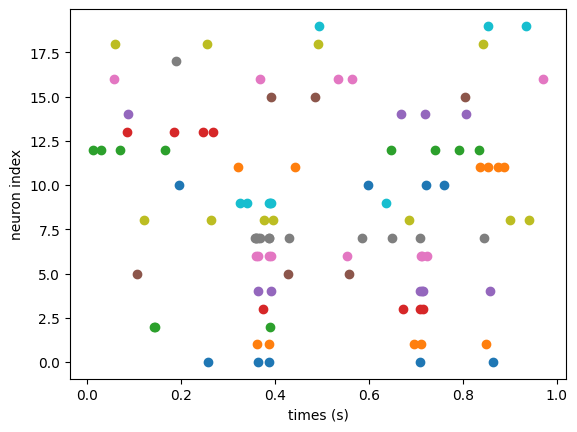

In [77]:
# plot raster

for i in range(m):
    n_spikes = spike_times[i].size
    plt.scatter(spike_times[i], [i]*n_spikes)
plt.xlabel('times (s)')
plt.ylabel('neuron index')

Test with SPADE

In [84]:
spiketrains = []
for i in range(m):
    spiketrains.append(neo.SpikeTrain(spike_times[i]*pq.s,
                                      t_start=0.0*pq.s,
                                      t_stop=1.0*pq.s))

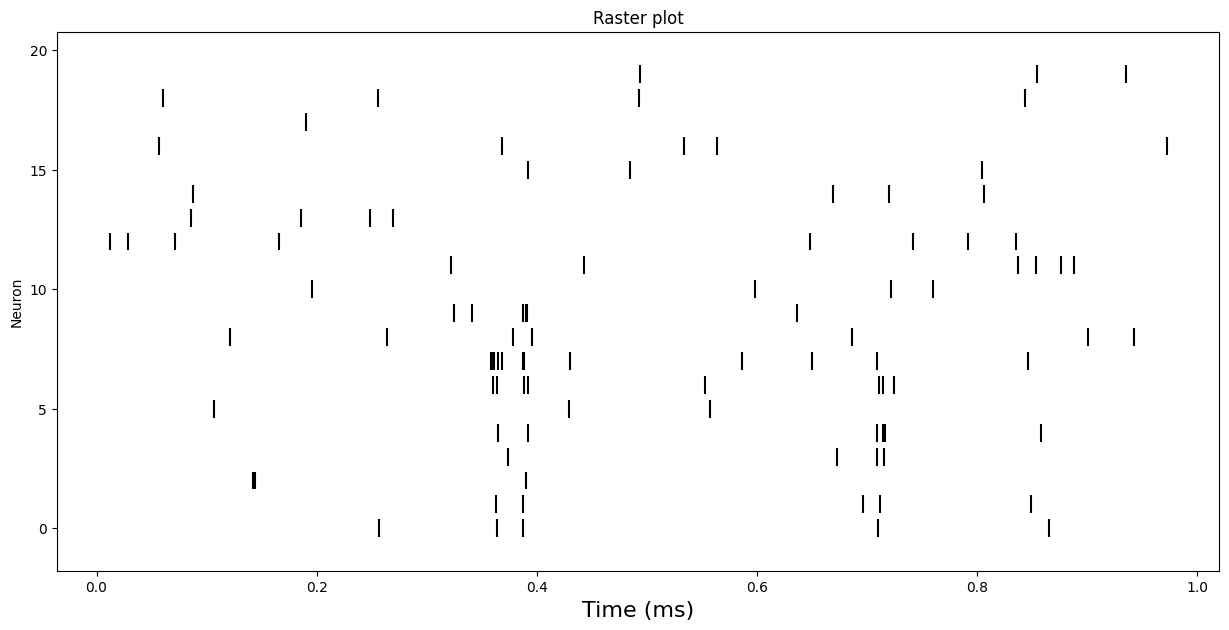

In [86]:
plt.figure(figsize=(15, 7))
plt.eventplot([spiketrains[i].magnitude for i in range(len(spiketrains))], linelengths=0.75, color='black')
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('Neuron')
plt.title("Raster plot");

In [85]:
patterns = elephant.spade.spade(
                            spiketrains=spiketrains, binsize=5*pq.ms, winlen=1, min_spikes=3,
                            n_surr=100,dither=25*pq.ms,
                            psr_param=[0,0,0],
                            output_format='patterns')['patterns']


Time for data mining: 0.04159259796142578
Time for pvalue spectrum computation: 4.113203287124634


In [87]:
print(patterns)

[{'itemset': (0, 1, 6), 'windows_ids': (72, 77, 142), 'neurons': [0, 1, 6], 'lags': array([0., 0.]) * ms, 'times': array([360., 385., 710.]) * ms, 'signature': (3, 3), 'pvalue': 0.0}]


In [89]:
print(ts*dt*pq.s)

[0.358 0.387 0.709] s
